### Effect of CO2 on Agricultural Yield

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random; random.seed(10) # pre-setting seed
from scipy import stats
from scipy.stats import norm, chi2, f

# For model fitting
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

# For panel data models
!pip install linearmodels
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects # BetweenOLS
from linearmodels.panel import compare # displaying panel data models

# For seemingly unrelated regression
from collections import OrderedDict
from linearmodels.system import SUR

# For R kernel
# Note: need working copy of R, initiate chunk with `%%R`
import rpy2.ipython
%load_ext rpy2.ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
data = files.upload()  # Opens a file picker to upload files

Saving Climate_Change_and_Agriculture.csv to Climate_Change_and_Agriculture.csv


In [ ]:
data2= pd.read_csv('Climate_Change_and_Agriculture.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  620 non-null    int64  
 1   State                 620 non-null    object 
 2   Yield_per_hectare     620 non-null    float64
 3   Fertilizer_consp      620 non-null    float64
 4   AnnualRainfall        620 non-null    float64
 5   Gross_irrigated_area  620 non-null    int64  
 6   Cropping_intensity    620 non-null    float64
 7   Agri_credit           620 non-null    float64
 8   MaxTemp               620 non-null    float64
 9   Gross_sown_area       620 non-null    int64  
 10  CO2_emission          620 non-null    float64
 11  Irrigation_Ratio      620 non-null    float64
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           1 non-null      float64
dtypes: float64(11), int64(3

In [ ]:
# Convert to MultiIndex DataFrame
agri_panel = data2.set_index([ 'State', 'Year'])
agri_panel.head() # should have a structured format

Yield_per_hectare  Fertilizer_consp  AnnualRainfall  \
State  Year                                                        
Andhra 1990        1443.462185             123.2         1357.14   
       1991        1425.927426             119.4         1014.48   
       1992        1500.867568             114.8          675.09   
       1993        1593.308011             117.0          819.30   
       1994        1530.957365             128.9          833.19   

             Gross_irrigated_area  Cropping_intensity  Agri_credit  MaxTemp  \
State  Year                                                                   
Andhra 1990                  5370               119.7         20.9    26.99   
       1991                  5378               119.5         22.5    27.06   
       1992                  5085               121.9         24.2    26.99   
       1993                  5020               122.4         25.4    27.23   
       1994                  5185               123.3         27.7    27.16   

             Gross_sown_area  CO2_emission  Irrigation_Ratio  Unnamed: 12  \
State  Year                                                                 
Andhra 1990            13193      0.647451         40.703403          NaN   
       1991            13192      0.683086         40.767132          NaN   
       1992            12754      0.690074         39.869845          NaN   
       1993            12688      0.703136         39.564943          NaN   
       1994            12783      0.725622         40.561683          NaN   

             Unnamed: 13  Unnamed: 14  
State  Year                            
Andhra 1990          NaN          NaN  
       1991          NaN        620.0  
       1992          NaN          NaN  
       1993          NaN          NaN  
       1994          NaN          NaN

In [ ]:
print(data2.shape) # dimensions

(620, 15)


In [ ]:
agri_p = agri_panel.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])#dropping unnecessary empty columns
agri_p.head()

Yield_per_hectare  Fertilizer_consp  AnnualRainfall  \
State  Year                                                        
Andhra 1990        1443.462185             123.2         1357.14   
       1991        1425.927426             119.4         1014.48   
       1992        1500.867568             114.8          675.09   
       1993        1593.308011             117.0          819.30   
       1994        1530.957365             128.9          833.19   

             Gross_irrigated_area  Cropping_intensity  Agri_credit  MaxTemp  \
State  Year                                                                   
Andhra 1990                  5370               119.7         20.9    26.99   
       1991                  5378               119.5         22.5    27.06   
       1992                  5085               121.9         24.2    26.99   
       1993                  5020               122.4         25.4    27.23   
       1994                  5185               123.3         27.7    27.16   

             Gross_sown_area  CO2_emission  Irrigation_Ratio  
State  Year                                                   
Andhra 1990            13193      0.647451         40.703403  
       1991            13192      0.683086         40.767132  
       1992            12754      0.690074         39.869845  
       1993            12688      0.703136         39.564943  
       1994            12783      0.725622         40.561683

## Introduction

# **Agricultural Yield Dataset Overview**  

Our dataset assesses the agricultural yield per hectare in India across 20 Indian States and 31 years. The primary aim is to measure the impact of Greenhouse Gases (GHGs), particularly CO2, on crop yield.  

In certain cases, increased CO2 levels can initially stimulate plant growth, leading to higher yields for specific crops. The analyses and tests conducted below aim to substantiate this claim and help identify the best model to study the effect of CO2 on agricultural yield.  

## **Variables in the Dataset**  

- **'Yield_per_hectare':** Yield in kilometers.  
- **'Fertilizer_consp':** Fertilizer consumption in kilograms per kilometer.  
- **'AnnualRainfall':** Annual rainfall in mm².  
- **'Gross_irrigated_area':** Gross irrigated area in km².  
- **'Cropping_intensity':** Crop density.  
- **'Agri_credit':** Agricultural loans provided.  
- **'MaxTemp':** Maximum temperature in the area (°C).  
- **'Gross_sown_area':** Gross sown area in km².  
- **'CO2_emission':** CO2 emissions in metric tonnes.  
- **'Irrigation_Ratio':** Ratio of irrigated to non-irrigated land.  


## Descriptive Analysis

In [ ]:
#five number summary
agri_p.describe()

,Yield_per_hectare,Fertilizer_consp,AnnualRainfall,Gross_irrigated_area,Cropping_intensity,Agri_credit,MaxTemp,Gross_sown_area,CO2_emission,Irrigation_Ratio
count,620.000000,620.000000,620.000000,620.000000,620.000000,6.200000e+02,620.000000,620.000000,620.000000,620.000000
mean,2279.942238,106.568177,1415.882968,3552.667742,150.787742,1.785492e+02,22.599677,9595.329032,1.133496,37.682012
std,1136.544701,81.413580,722.812235,3079.066305,41.496182,3.203585e+02,7.522449,8599.302683,0.374422,22.763926
min,503.350231,0.600000,201.510000,38.000000,100.000000,1.000000e-07,-3.300000,187.000000,0.647451,3.595847
25%,1430.863615,47.400000,899.930000,435.500000,121.900000,8.277500e+00,23.700000,2225.750000,0.817360,20.877002
50%,1968.481335,85.700000,1197.275000,3509.000000,139.300000,3.080000e+01,25.315000,7864.500000,0.984261,31.451964
75%,2825.427005,150.450000,1845.655000,5674.000000,170.525000,1.887500e+02,26.070000,12878.000000,1.527674,48.296870
max,6505.000000,494.600000,3718.890000,18424.000000,312.900000,1.980530e+03,28.230000,35615.000000,1.795595,99.055742


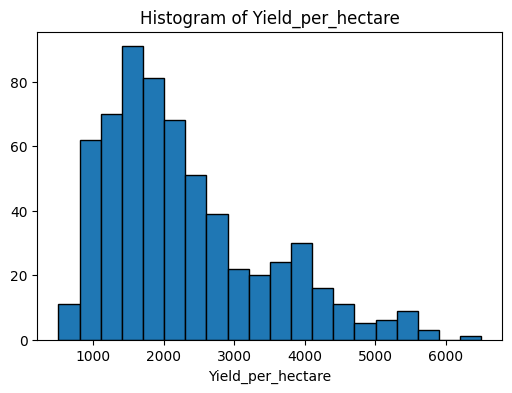

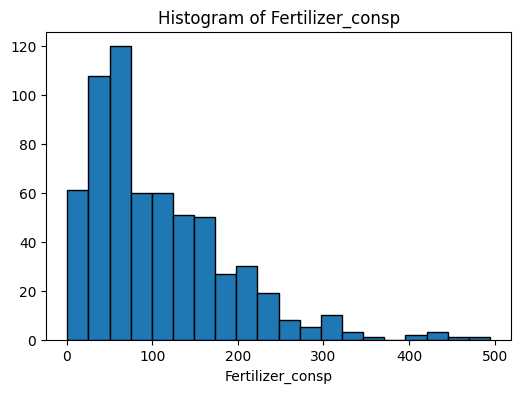

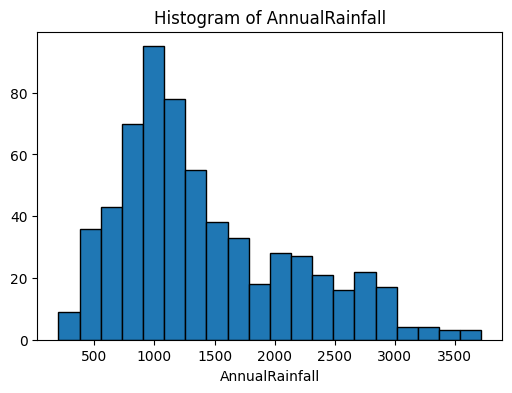

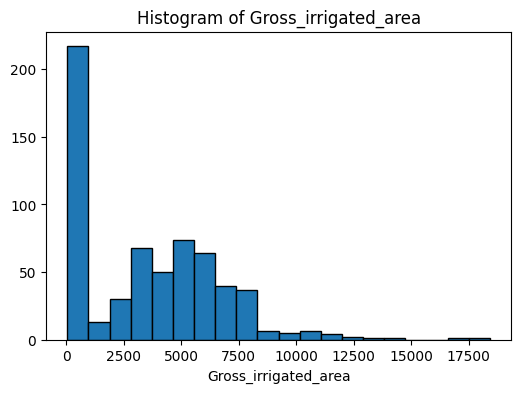

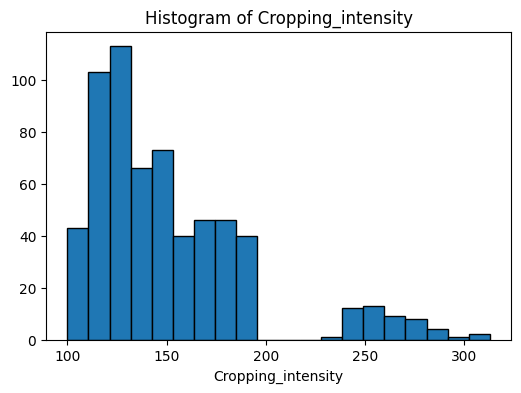

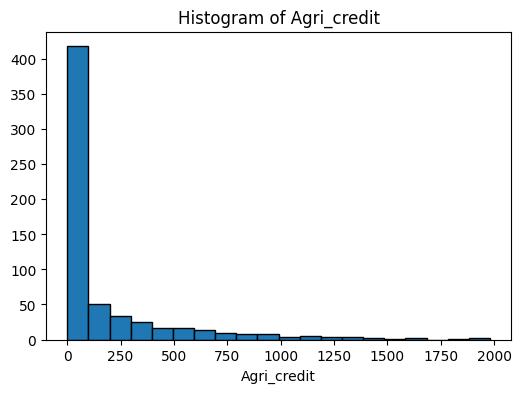

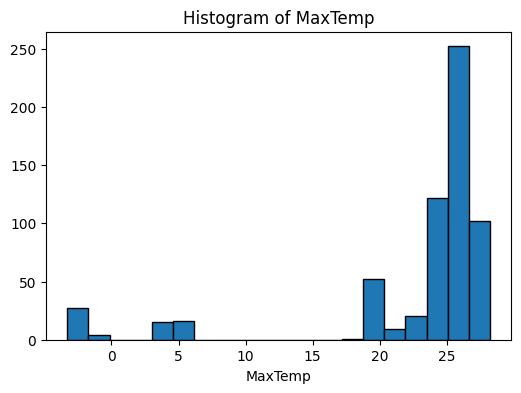

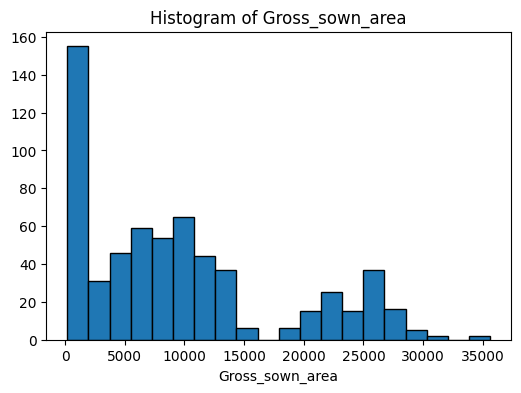

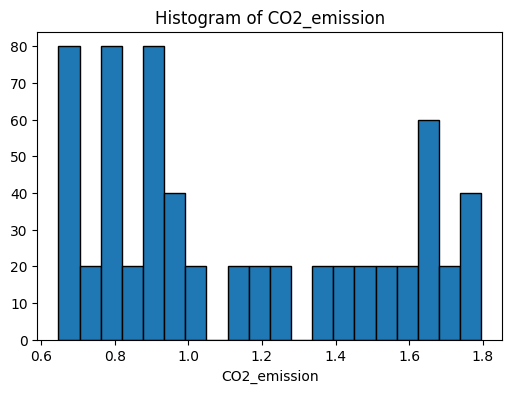

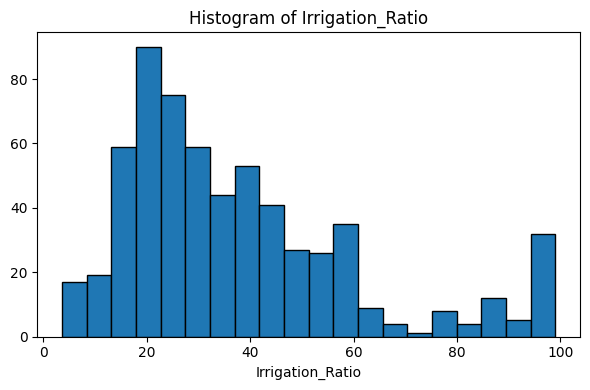

In [ ]:
#histograms
variables = [
    'Yield_per_hectare',
    'Fertilizer_consp',
    'AnnualRainfall',
    'Gross_irrigated_area',
    'Cropping_intensity',
    'Agri_credit',
    'MaxTemp',
    'Gross_sown_area',
    'CO2_emission',
    'Irrigation_Ratio'
]


for var in variables:
    plt.figure(figsize=(6, 4))
    plt.hist(agri_p[var], bins=20, edgecolor='k')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)


plt.tight_layout()
plt.show()

### Data Distribution Analysis

- **Yield_per_hectare:** Left-skewed.
- **Fertilizer_consp:** Left-skewed.
- **AnnualRainfall:** Left-skewed.
- **Gross_irrigated_area:** Many outliers (0-830), indicating uneven spread with small unirrigated areas.
- **Cropping_intensity:** Bimodal, with two normally distributed peaks.
- **Agri_credit:** Heavily skewed, likely due to frequent small credit disbursals.
- **MaxTemp:** Centered around 25°C, with outliers at 5°C and -1°C.
- **Gross_sown_area:** Bimodal, possibly indicating non-productive areas (e.g., grass for fodder).
- **CO2_emission:** Not normally distributed.
- **Irrigation_Ratio:** Normal distribution with a few outliers, centered around 22%.


<Figure size 600x400 with 0 Axes>

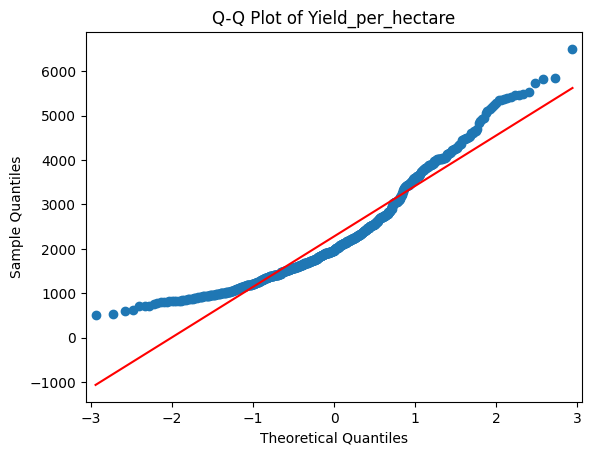

<Figure size 600x400 with 0 Axes>

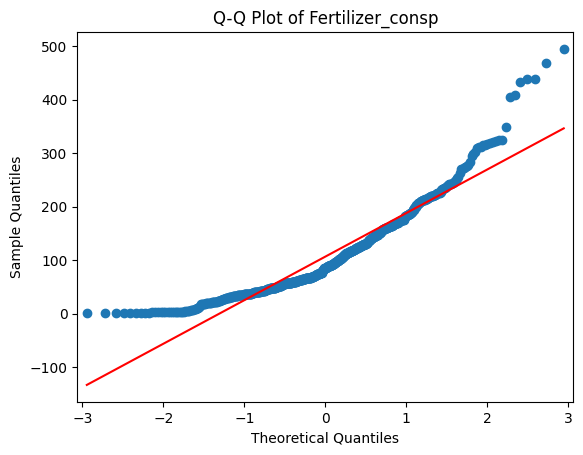

<Figure size 600x400 with 0 Axes>

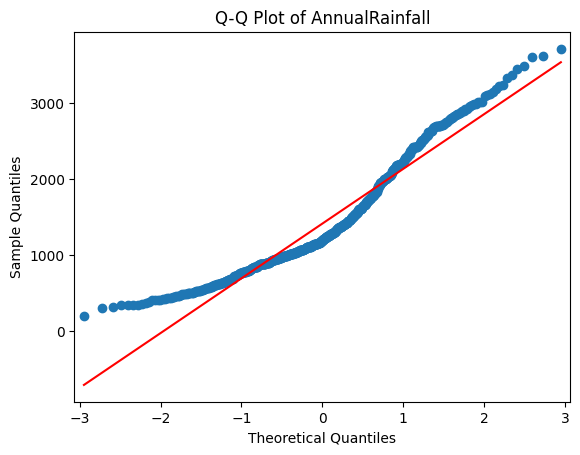

<Figure size 600x400 with 0 Axes>

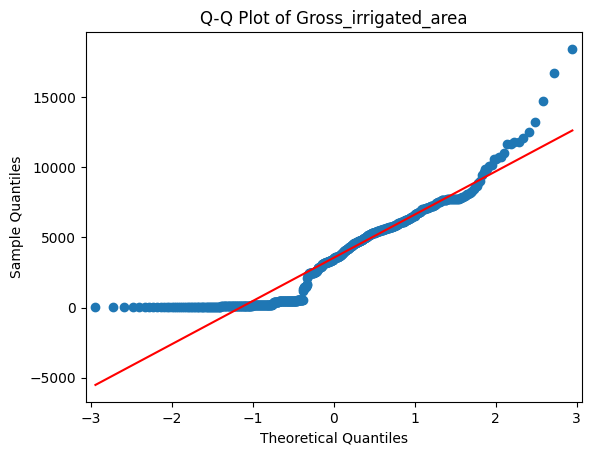

<Figure size 600x400 with 0 Axes>

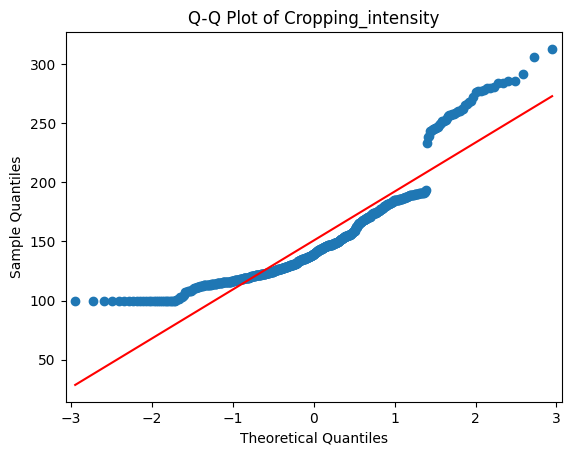

<Figure size 600x400 with 0 Axes>

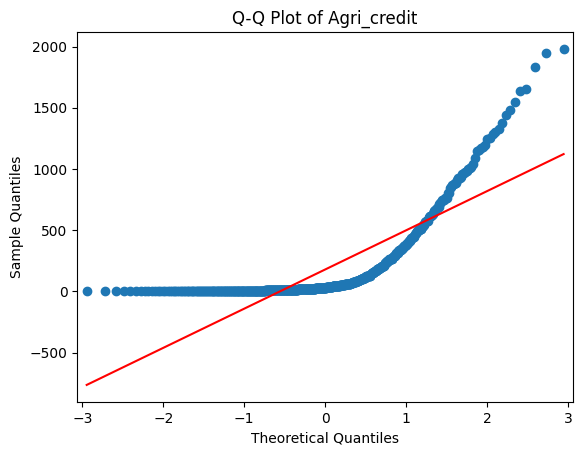

<Figure size 600x400 with 0 Axes>

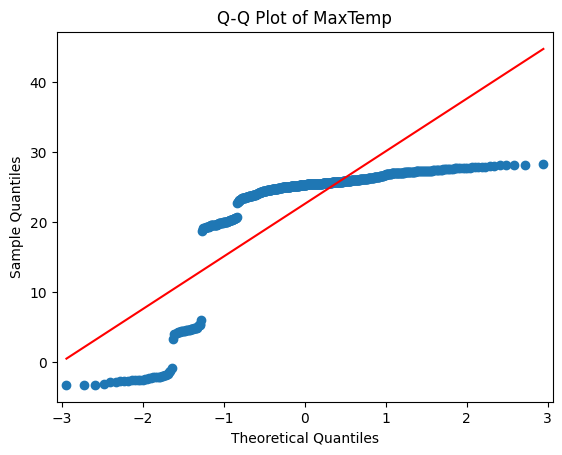

<Figure size 600x400 with 0 Axes>

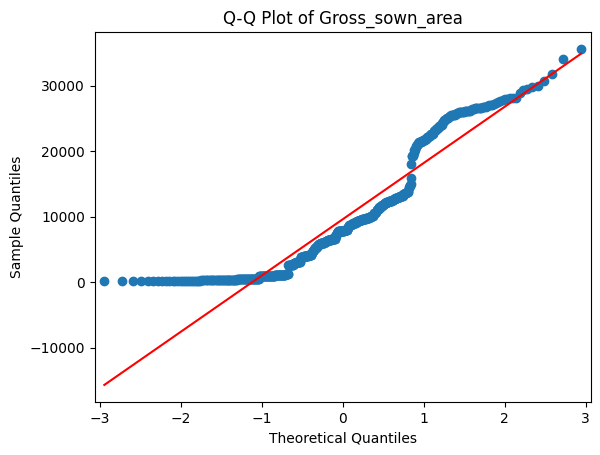

<Figure size 600x400 with 0 Axes>

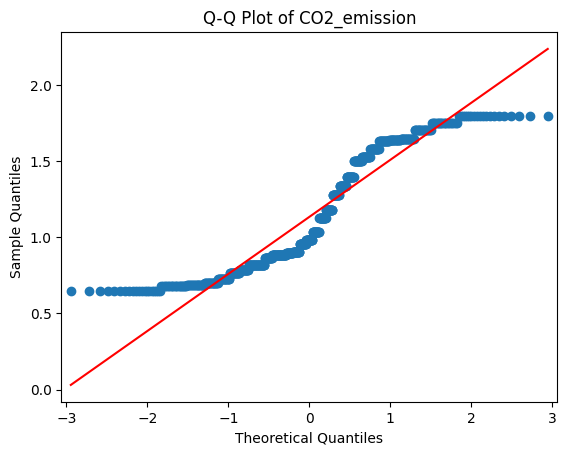

<Figure size 600x400 with 0 Axes>

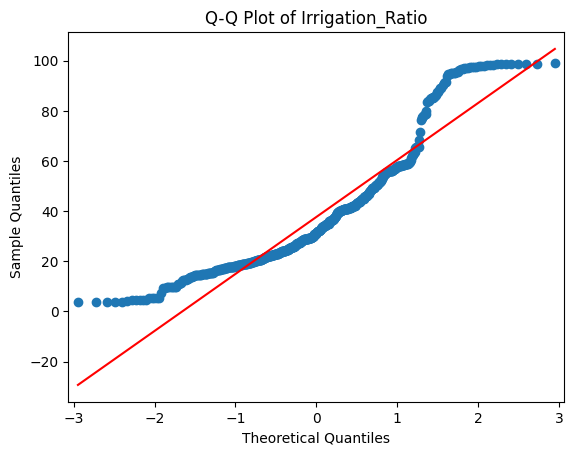

In [ ]:
#fitted distributions

for var in variables:
    plt.figure(figsize=(6, 4))
    sm.qqplot(agri_p[var], line='s')
    plt.title(f'Q-Q Plot of {var}')
    plt.show()


### Data Distribution Analysis
Yield per hectare and Fertilizer consumption seem normally distributed as does annual rainfall and irrigation ratios. their graphs match the 45 degree line the most closely.
However, CO2 Emission, gross sown area, max temp, Cropping intensity, gross irrigated area, agri credit do not match up with their 45 degree line thereby having non-normal distributions. we will later explore possible transformations

                      Yield_per_hectare  Fertilizer_consp  AnnualRainfall  \
Yield_per_hectare              1.000000          0.634371        0.123195   
Fertilizer_consp               0.634371          1.000000       -0.394567   
AnnualRainfall                 0.123195         -0.394567        1.000000   
Gross_irrigated_area           0.247411          0.602336       -0.609182   
Cropping_intensity             0.520243          0.502156       -0.152351   
Agri_credit                    0.390858          0.604873       -0.197185   
MaxTemp                        0.147340          0.289036       -0.004595   
Gross_sown_area               -0.028293          0.353336       -0.481510   
CO2_emission                   0.399431          0.363248        0.001426   
Irrigation_Ratio               0.375681          0.552012       -0.502576   

                      Gross_irrigated_area  Cropping_intensity  Agri_credit  \
Yield_per_hectare                 0.247411            0.520243     0.3908

Text(0.5, 1.0, 'Correlation Heatmap')

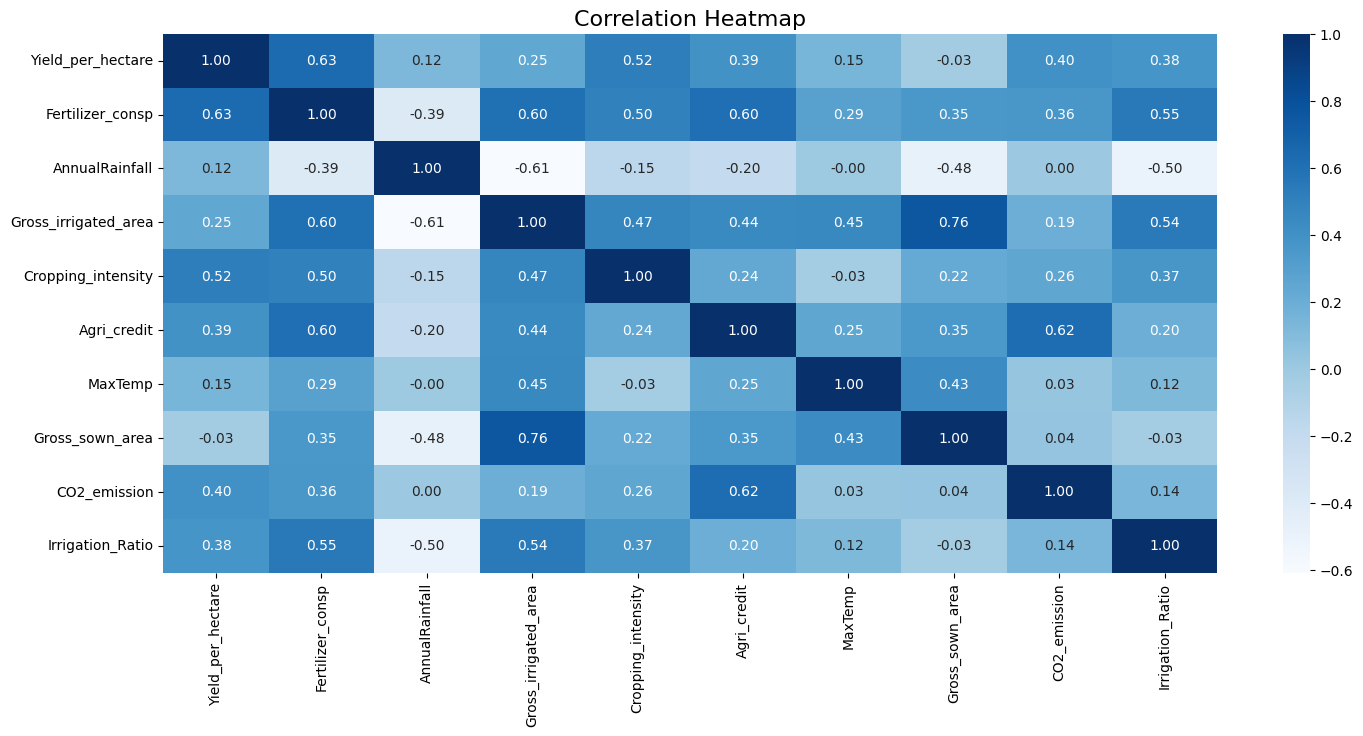

In [ ]:
#correlation plot
C = agri_p[['Yield_per_hectare',
              'Fertilizer_consp',
              'AnnualRainfall',
              'Gross_irrigated_area',
              'Cropping_intensity',
              'Agri_credit',
              'MaxTemp',
              'Gross_sown_area',
              'CO2_emission',
              'Irrigation_Ratio']].corr()

# Display the correlation matrix
print(C)

# Create a heatmap
plt.figure(figsize=(17, 7))
sns.heatmap(C, annot=True, cmap="Blues", fmt=".2f")

# Add title
plt.title("Correlation Heatmap", fontsize=16)


# **Correlation Analysis**  

## **Variables with Positive Correlation**  

- **Yield per hectare and Fertilizer consumption (0.63):**  
  - A moderate positive correlation suggests that increasing fertilizer use is associated with an increase in yield per hectare.  

- **Yield per hectare and Cropping intensity (0.52):**  
  - Indicates that higher cropping intensity (e.g., multi-cropping or increased agricultural activity) is associated with better yields.  

- **Fertilizer consumption and Gross irrigated area (0.60):**  
  - Suggests that areas with more irrigation tend to use more fertilizers, possibly due to increased agricultural activity.  

- **Gross sown area and Gross irrigated area (0.76):**  
  - A strong positive correlation, indicating that areas with more sown area also tend to have higher irrigation coverage.  

- **CO2 emission and Agri credit (0.62):**  
  - Implies that higher agricultural credit is associated with increased CO2 emissions, possibly reflecting higher mechanization or chemical use.  

- **Irrigation ratio and Fertilizer consumption (0.55):**  
  - Suggests that areas with better irrigation facilities also utilize more fertilizers.  

---

## **Variables with Negative Correlation**  

- **Annual rainfall and Gross irrigated area (-0.61):**  
  - A significant negative correlation indicates that areas receiving more rainfall rely less on irrigation.  

- **Annual rainfall and Irrigation ratio (-0.50):**  
  - Reinforces the observation that higher natural rainfall reduces dependence on artificial irrigation.  

- **Gross sown area and Annual rainfall (-0.48):**  
  - Indicates that areas with higher sown area might not always align with high rainfall regions, potentially relying on irrigation instead.  

---

## **Weak Correlations**  

- **Yield per hectare and Annual rainfall (0.12):**  
  - A weak correlation suggests that rainfall alone has limited influence on yield, possibly due to dependence on other factors like fertilizer or irrigation.  

- **Yield per hectare and Max temperature (0.15):**  
  - A weak positive relationship indicates minimal influence of temperature on yield.  

- **Gross sown area and CO2 emissions (0.04):**  
  - Implies negligible association between the extent of sown area and carbon emissions.  

---

## **Key Takeaways for the Project**  

1. **Focus on irrigation and fertilizer use:**  
   - The strong positive correlations between these variables and yield highlight their importance in improving agricultural productivity.  

2. **Consider rainfall's role in irrigation planning:**  
   - The inverse relationship between rainfall and irrigation variables shows that regions with less rainfall might need targeted irrigation interventions.  

3. **Environmental impact of agriculture:**  
   - The correlation between agricultural credit and CO2 emissions suggests that intensification of farming practices may come at an environmental cost, warranting sustainable approaches.  

4. **Strategic use of cropping intensity:**  
   - A moderate positive relationship with yield suggests that optimizing cropping patterns can enhance productivity.  


In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

pd.DataFrame.iteritems = pd.DataFrame.items

In [ ]:
# Set things up to share objects between R and python environments
pandas2ri.activate()
# Have to convert panda dataframe to R dataframe, in this case agri_p is our pandas dataframe
r_df1 = pandas2ri.py2rpy(agri_p)


# Then stash our new R datastructure in a global envrionment we can grab later
robjects.globalenv['data_f'] = pandas2ri.py2rpy(data2)


In [ ]:
#Cullen-Frey Graphs
%%R
install.packages(c("fitdistrplus"))

(as ‘lib’ is unspecified)







	‘/tmp/RtmpW7qqkX/downloaded_packages’



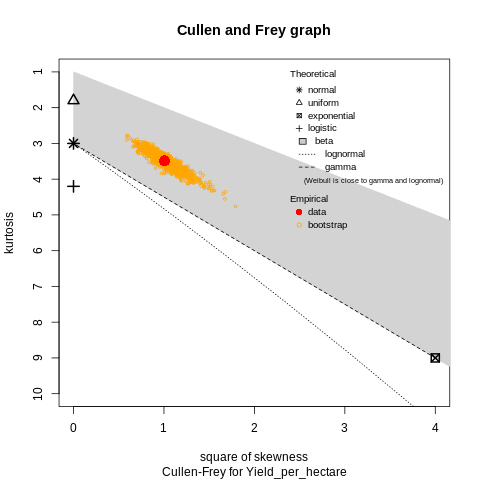

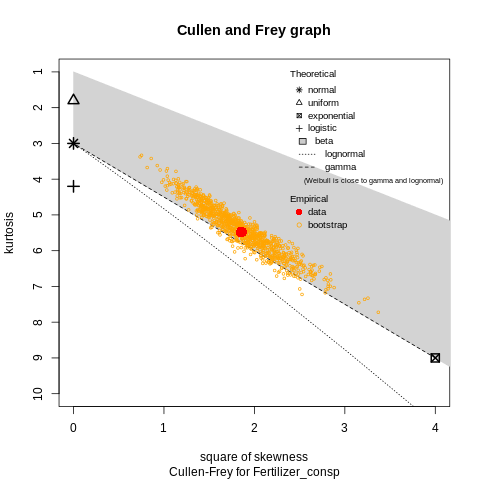

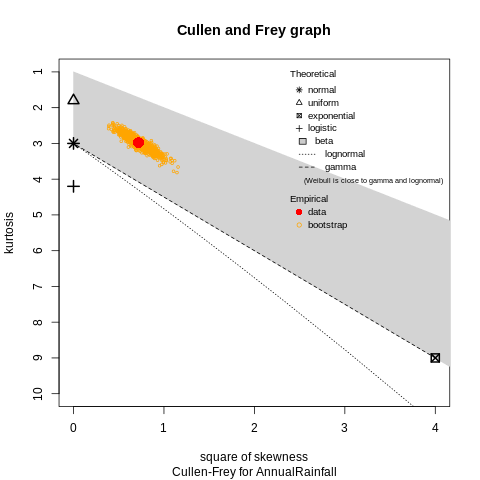

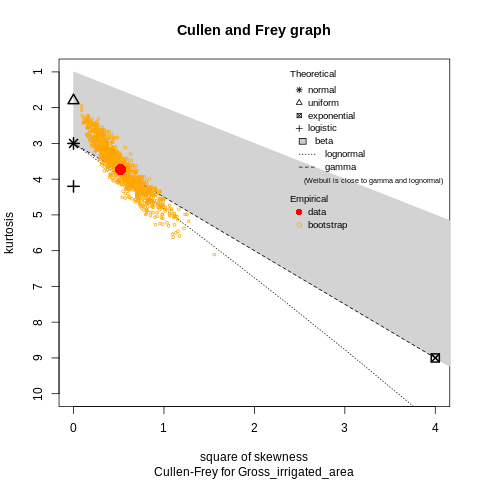

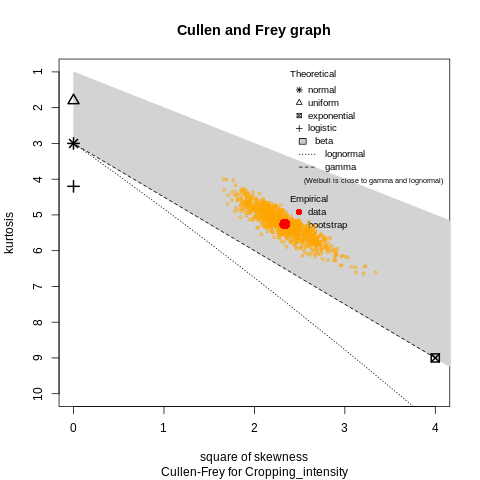

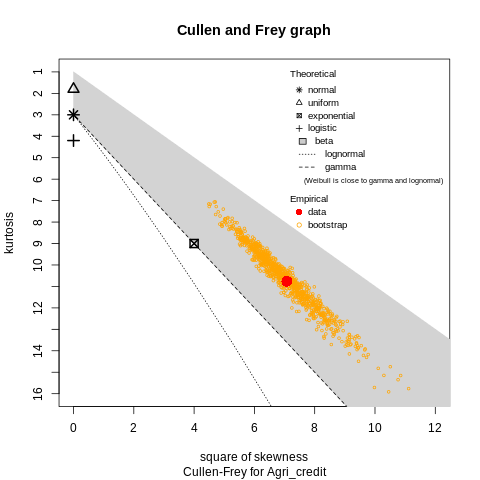

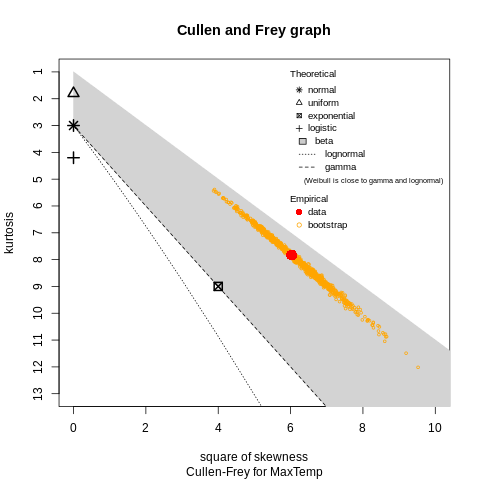

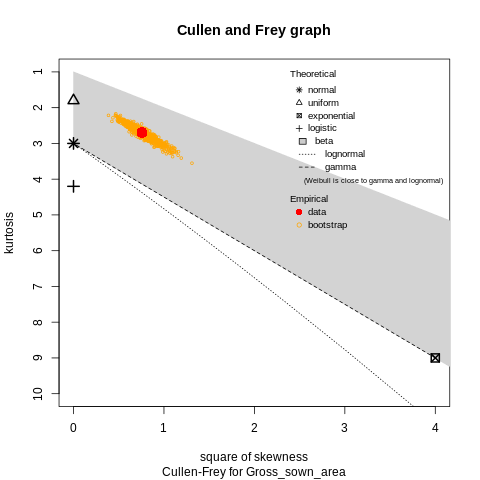

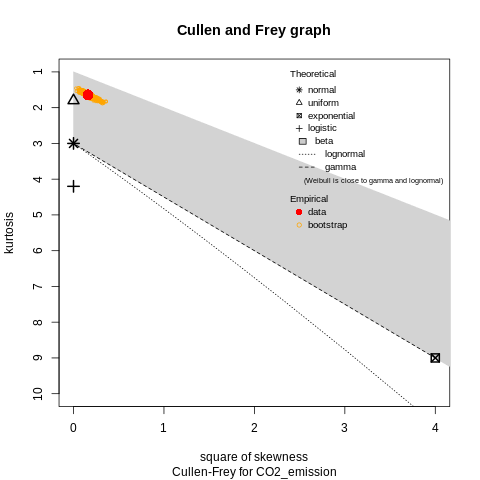

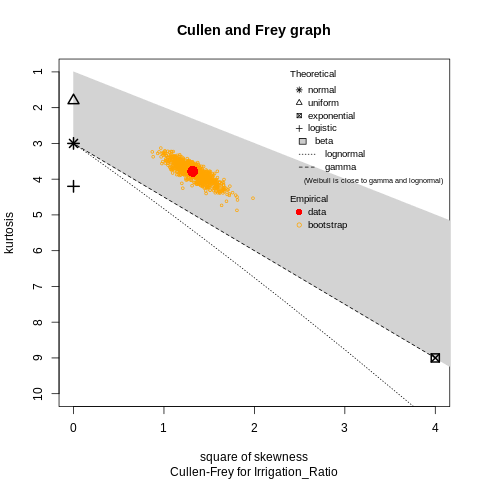

In [ ]:
%%R

library("fitdistrplus")
set.seed(10) # for bootstrap

descdist(data_f$Yield_per_hectare, boot = 1000)
title(sub = "Cullen-Frey for Yield_per_hectare")


descdist(data_f$Fertilizer_consp, boot = 1000)
title(sub = "Cullen-Frey for Fertilizer_consp")

descdist(data_f$AnnualRainfall, boot = 1000)
title(sub = "Cullen-Frey for AnnualRainfall")

descdist(data_f$Gross_irrigated_area, boot = 1000)
title(sub = "Cullen-Frey for Gross_irrigated_area")

descdist(data_f$Cropping_intensity, boot = 1000)
title(sub = "Cullen-Frey for Cropping_intensity")

descdist(data_f$Agri_credit, boot = 1000)
title(sub = "Cullen-Frey for Agri_credit")

descdist(data_f$MaxTemp, boot = 1000)
title(sub = "Cullen-Frey for MaxTemp")

descdist(data_f$Gross_sown_area, boot = 1000)
title(sub = "Cullen-Frey for Gross_sown_area")

descdist(data_f$CO2_emission, boot = 1000)
title(sub = "Cullen-Frey for CO2_emission")

descdist(data_f$Irrigation_Ratio, boot = 1000)
title(sub = "Cullen-Frey for Irrigation_Ratio")


### Distribution Analysis

- **Yield_per_hectare:** Normal, Gamma, and Lognormal.
- **Fertilizer_consp:** Gamma, Lognormal, Exponential.
- **AnnualRainfall:** Gamma, Lognormal, Normal.
- **Gross_irrigated_area:** Gamma, Normal, Lognormal.
- **Cropping_intensity:** Lognormal, Gamma, Exponential.
- **Agri_credit:** Exponential, Gamma, Lognormal.
- **MaxTemp:** Lognormal, Gamma, Exponential.
- **Gross_sown_area:** Gamma, Normal, Lognormal.
- **CO2_emission:** Uniform, Gamma, Lognormal.
- **Irrigation_Ratio:** Gamma, Normal, Lognormal.


In [ ]:
#fitter graphs
!pip install fitter
from fitter import Fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.9 MB/s eta 0:00:00


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,4.850671e-07,1875.084960,1888.374118,inf,0.045363,1.511552e-01
gamma,5.128528e-07,1874.576725,1887.865884,inf,0.041636,2.263426e-01
norm,1.195144e-06,1943.715091,1952.574530,inf,0.114260,1.656305e-07


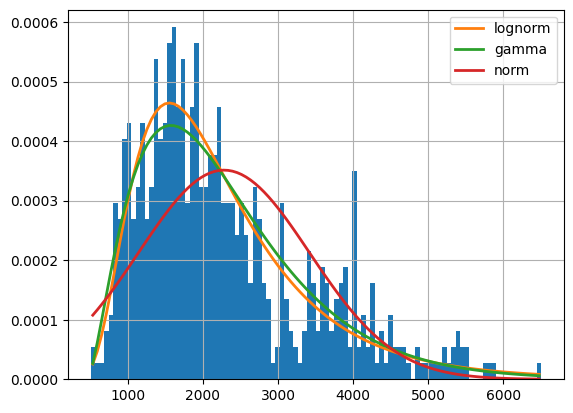

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Yield_per_hectare'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for 'Yield_per_hectare'")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000153,1445.461780,1458.750938,inf,0.044549,1.655969e-01
gamma,0.000159,1446.559793,1459.848951,inf,0.042434,2.082159e-01
expon,0.000251,1402.805456,1411.664895,inf,0.135759,1.989525e-10
norm,0.000273,1675.383491,1684.242930,inf,0.127315,3.209416e-09


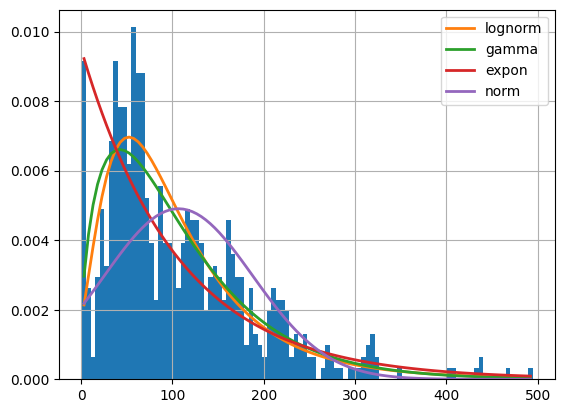

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Fertilizer_consp'], distributions=[ 'norm','lognorm', 'gamma', 'expon'])
data_fit.fit()
plt.title("Fitting for Fertilizer_consp")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000002,1738.132347,1751.421506,inf,0.051163,7.519892e-02
gamma,0.000002,1733.951119,1747.240277,inf,0.060182,2.148925e-02
norm,0.000004,1758.691954,1767.551393,inf,0.126948,3.606326e-09


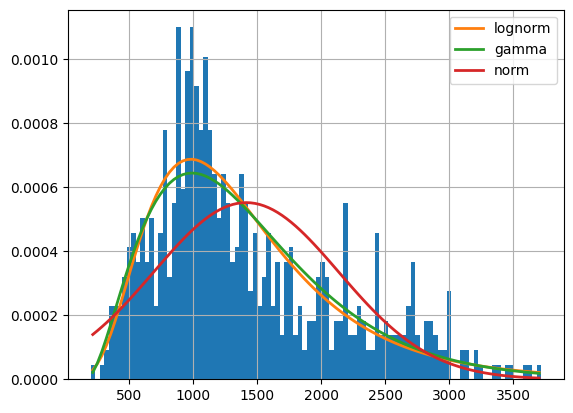

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['AnnualRainfall'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for 'AnnualRainfall'")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,8.433640e-07,2182.227561,2195.516719,inf,0.244038,5.380230e-33
gamma,9.845499e-07,2159.040490,2172.329648,inf,0.196136,2.257452e-21
norm,1.708929e-06,2432.335819,2441.195258,inf,0.183684,8.821369e-19


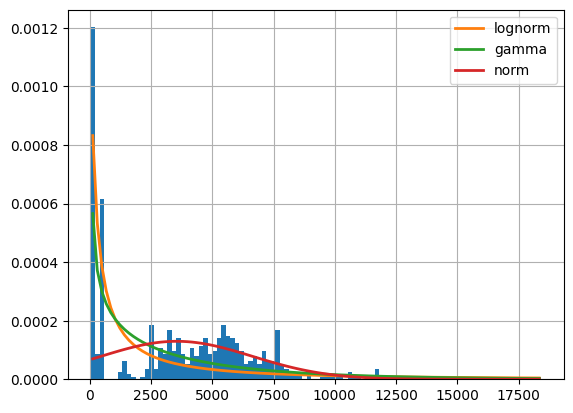

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Gross_irrigated_area'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for Gross_irrigated_area")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001176,1239.459422,1252.748580,inf,0.050181,8.513997e-02
gamma,0.001262,1232.864438,1246.153596,inf,0.060578,2.024525e-02
norm,0.001933,1332.658547,1341.517986,inf,0.129509,1.585718e-09


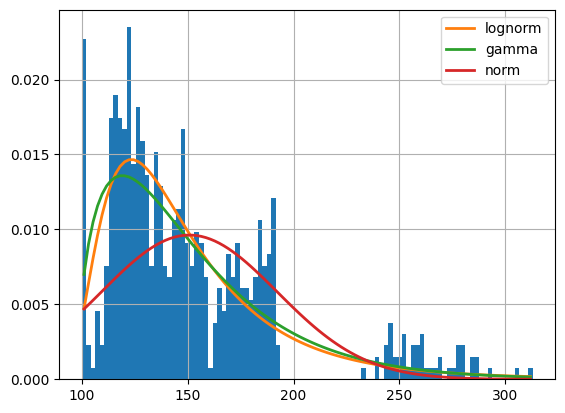

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Cropping_intensity'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for Cropping_intensity")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000036,1883.923114,1897.212272,inf,0.058987,2.566795e-02
gamma,0.000156,1792.920743,1806.209902,inf,0.120154,2.944647e-08
expon,0.000279,2150.207503,2159.066942,inf,0.346382,5.834969e-67
norm,0.000440,2303.534798,2312.394237,inf,0.288493,3.496186e-46


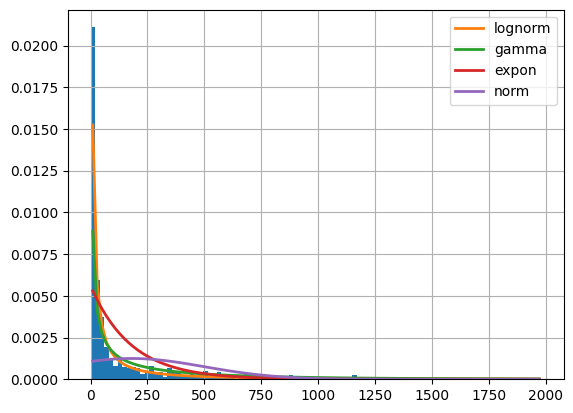

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Agri_credit'], distributions=[ 'norm', 'gamma', 'lognorm', 'expon'])
data_fit.fit()
plt.title("Fitting for Agri_credit")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.399690,911.119369,924.408527,inf,0.322075,9.972317e-58
gamma,0.413885,905.734704,919.023862,inf,0.343848,5.801725e-66
expon,0.532788,776.585071,785.444510,inf,0.475833,1.788004e-129


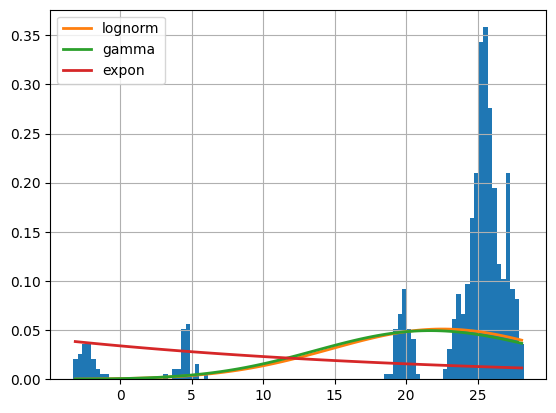

In [ ]:

plt.figure()
data_fit = Fitter(agri_p['MaxTemp'], distributions=[ 'gamma', 'lognorm', 'expon'])
data_fit.fit()
plt.title("Fitting for MaxTemp")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.716387e-07,2216.481976,2229.771135,inf,0.112956,2.399013e-07
lognorm,2.363993e-07,2242.669591,2255.958750,inf,0.137213,1.210186e-10
norm,2.764597e-07,2234.610340,2243.469778,inf,0.136766,1.410735e-10


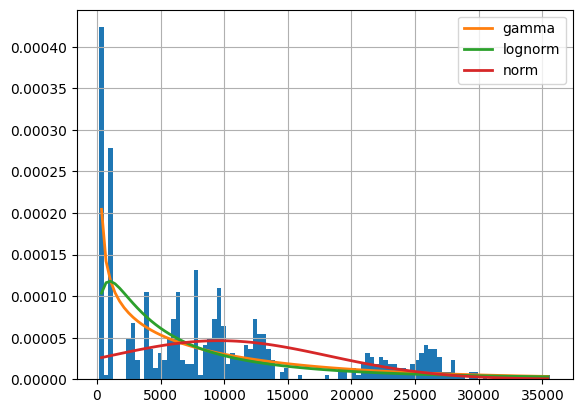

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Gross_sown_area'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for Gross_sown_area")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,231.997599,31.629342,40.488781,inf,0.226898,1.561768e-28
lognorm,232.420326,99.647909,112.937068,inf,0.127211,3.317011e-09
norm,249.999002,75.165864,84.025303,inf,0.180528,3.754166e-18
gamma,295.882153,165.934185,179.223343,inf,0.282308,3.309746e-44


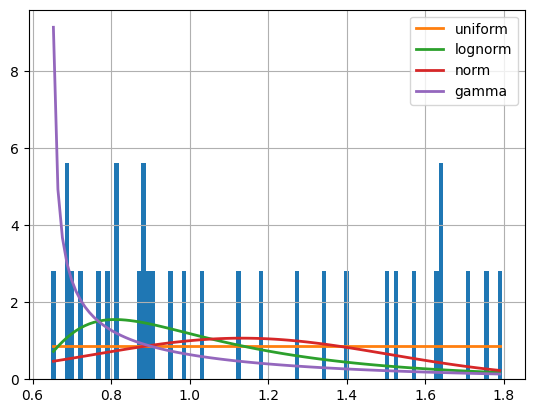

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['CO2_emission'], distributions=['uniform', 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for CO2_emission")
data_fit.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.004743,998.744968,1012.034127,inf,0.045003,1.574022e-01
gamma,0.005025,989.831399,1003.120558,inf,0.054040,5.155162e-02
norm,0.007216,995.408440,1004.267879,inf,0.119294,3.809348e-08


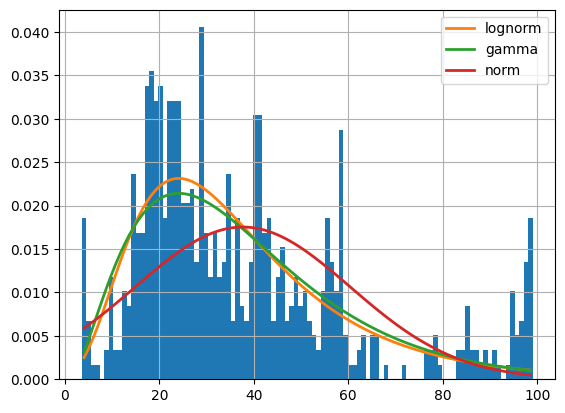

In [ ]:
plt.figure()
data_fit = Fitter(agri_p['Irrigation_Ratio'], distributions=[ 'norm', 'gamma', 'lognorm'])
data_fit.fit()
plt.title("Fitting for Irrigation_Ratio")
data_fit.summary()

### Distribution Fitting Analysis

Using Cullen-Frey graphs, we estimated the potential distributions for our variables and generated distribution fitting plots to identify the best-fitting distributions. Based on the results, the following transformations are recommended:

- **Yield_per_hectare:** Lognormal fits best.
- **Fertilizer_consp:** Lognormal.
- **AnnualRainfall:** Lognormal.
- **Gross_irrigated_area:** Lognormal.
- **Cropping_intensity:** Lognormal.
- **Agri_credit:** Lognormal.
- **MaxTemp:** Lognormal.
- **Gross_sown_area:** Gamma.
- **CO2_emission:** Uniform.
- **Irrigation_Ratio:** Lognormal.

We will apply the appropriate transformations based on these findings.


## Model Fitting
We now proceed to fit Pooled, Fixed Effects, and Random Effects Models to our panel data.

In [ ]:
#transformations
agri_p['lyield'] = np.log(agri_p['Yield_per_hectare'])
agri_p['lfertilizer'] = np.log(agri_p['Fertilizer_consp'])
agri_p['lrain'] = np.log(agri_p['AnnualRainfall'])
agri_p['lirrigated'] = np.log(agri_p['Gross_irrigated_area'])
agri_p['lcrop'] = np.log(agri_p['Cropping_intensity'])
agri_p['lcred'] = np.log(agri_p['Agri_credit'])
agri_p['lsown'] = np.log(agri_p['Gross_sown_area'])
agri_p['lirr_ratio'] = np.log(agri_p['Irrigation_Ratio'])
agri_p['lCo2'] = np.log(agri_p['CO2_emission'])
agri_p['MaxTemp'] = (agri_p['MaxTemp'] *(9/5)) + 32
agri_p['ltemp'] = np.log(agri_p['MaxTemp'])



In [ ]:
# Specify Pooled OLS
nls_pooled_model = PooledOLS.from_formula(
    'lyield~ 1 + lCo2 + lfertilizer + lrain + lirrigated + lcrop + lcred + lsown + lirr_ratio + ltemp ',
    data=agri_p)

# Estimating basic model
nls_pooled1 = nls_pooled_model.fit()
print(nls_pooled1.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 lyield   R-squared:                        0.5837
Estimator:                  PooledOLS   R-squared (Between):              0.5349
No. Observations:                 620   R-squared (Within):               0.6821
Date:                Sat, Jan 18 2025   R-squared (Overall):              0.5837
Time:                        19:07:24   Log-likelihood                   -163.45
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.029
Entities:                          20   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(9,610)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):          1.648e+06
                            

### Key Regression Results

- **lCo2:** 0.2904 (p-value = 0.0000)  
  A 1% increase in CO₂ (lCo2) is associated with a 0.29% increase in yield.  
  Statistically significant at the 1% level.

- **lfertilizer:** 0.2373 (p-value = 0.0000)  
  A 1% increase in fertilizer use is associated with a 0.24% increase in yield.  
  Statistically significant and highlights the importance of fertilizer.

- **lrain:** 0.1622 (p-value = 0.0000)  
  A 1% increase in rainfall is associated with a 0.16% increase in yield.  
  Statistically significant.

- **lirrigated:** -8.092e+07 (p-value = 0.0000)  
  The coefficient is extremely large and negative, indicating potential scaling or multicollinearity issues.

- **lcrop:** 0.9182 (p-value = 0.0000)  
  A 1% increase in crop area is associated with a 0.92% increase in yield.  
  Strong, positive, and significant impact.

- **lcred:** -0.0082 (p-value = 0.1690)  
  Credit usage has a negative but statistically insignificant effect on yield (p-value > 0.05).

- **lsown:** 8.092e+07 (p-value = 0.0000)  
  Similar to lirrigated, this variable has an extremely large positive coefficient, suggesting scaling or multicollinearity issues.

- **lirr_ratio:** 8.092e+07 (p-value = 0.0000)  
  Like lsown and lirrigated, the coefficient is implausibly large.

- **ltemp:** 0.6432 (p-value = 0.0000)  
  A 1% increase in temperature is associated with a 0.64% increase in yield.  
  Statistically significant.

### Key Insights

- **lCo2, lfertilizer, lrain, lcrop,** and **ltemp** have statistically significant, positive effects on yield.
- **Fertilizer** and **crop area** are particularly strong drivers of yield.


In [ ]:
# Estimate the Pooled OLS w/ cluster-robust standard errors
nls_pooled2 = nls_pooled_model.fit(cov_type='clustered', cluster_entity=True)
## Note: `cluster_entity=True` uses indices as clusters, which is what we want

print(nls_pooled2.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 lyield   R-squared:                        0.5837
Estimator:                  PooledOLS   R-squared (Between):              0.5349
No. Observations:                 620   R-squared (Within):               0.6821
Date:                Sat, Jan 18 2025   R-squared (Overall):              0.5837
Time:                        19:07:27   Log-likelihood                   -163.45
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      95.029
Entities:                          20   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(9,610)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):            -4018.5
                            

The model above uses the pooled model but clusters the standard errors to provide a to provide more accurate std error estimates.

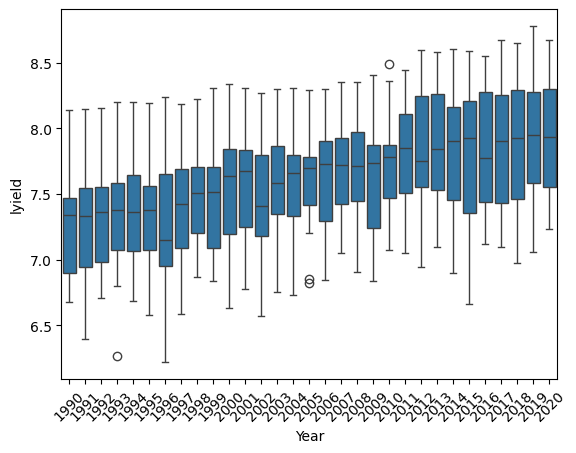

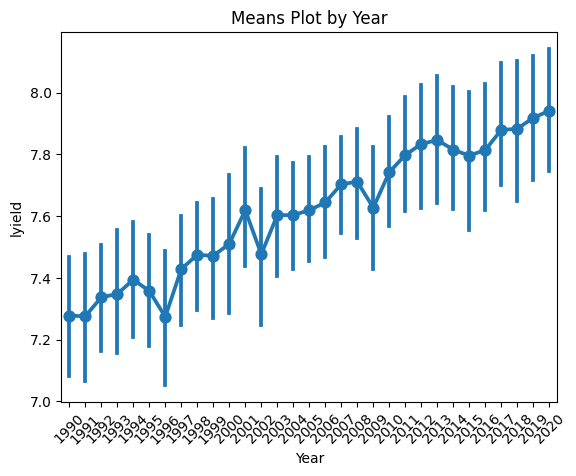

In [ ]:

sns.boxplot(agri_p, x='Year', y='lyield')
plt.xticks(rotation=45)
plt.show()


sns.pointplot(agri_p, x='Year', y='lyield')
plt.title('Means Plot by Year')
plt.xticks(rotation=45)
plt.show()


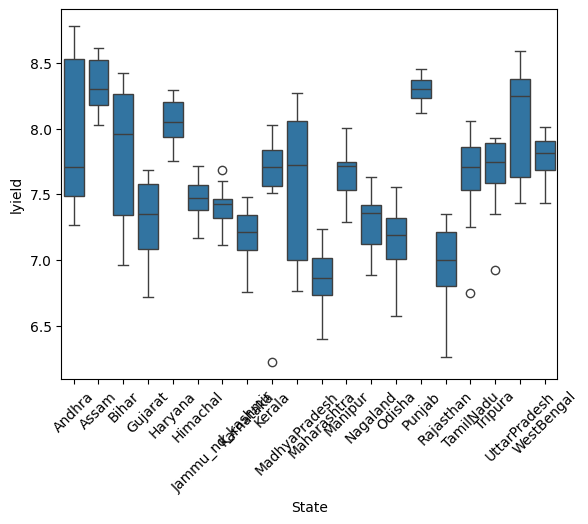

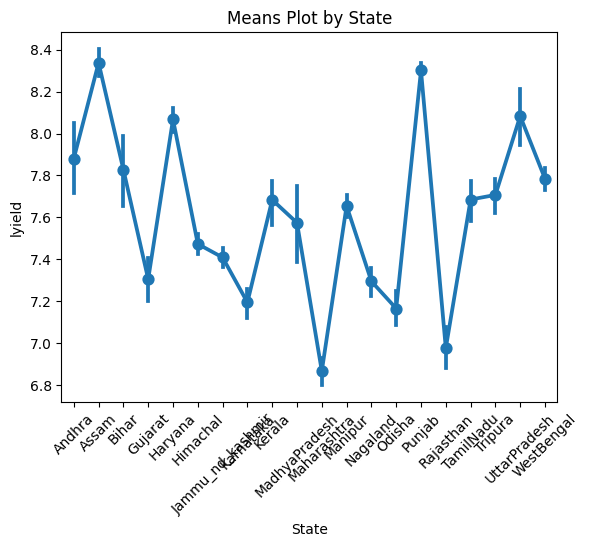

In [ ]:
# We can start be exploring heterogeneity across time (year) and individuals (id)
sns.boxplot(agri_p, x='State', y='lyield')
plt.xticks(rotation=45)
plt.show()

# Too many outliers, let's try just plotting the means
sns.pointplot(agri_p, x='State', y='lyield')
plt.title('Means Plot by State')
plt.xticks(rotation=45)
plt.show()
# Cleaner result, easier to interpret

As we see difference across time and State in our box plots above, we can conclude that the pooled model is not the right fit. We can explore the effects in the fixed and random effects model

## 2. Fixed Effects

In [ ]:
nls_fixedeff = PanelOLS.from_formula(
    'lyield~ 1 + lCo2 + lfertilizer + lrain + lirrigated + lcrop + lcred + lsown + lirr_ratio + ltemp + EntityEffects ', data=agri_p).fit()
print(nls_fixedeff.summary)

# We can now test if we need the fixed effects by performing a
# hypothesis test between the pooled and fixed effects models
print(nls_fixedeff.f_pooled)

# Since p-value ~ 0, we reject H0: no effects needed
# We conclude that fixed effects are needed

                          PanelOLS Estimation Summary                           
Dep. Variable:                 lyield   R-squared:                        0.7401
Estimator:                   PanelOLS   R-squared (Between):             -0.1076
No. Observations:                 620   R-squared (Within):               0.7401
Date:                Sat, Dec 07 2024   R-squared (Overall):              0.1735
Time:                        00:01:58   Log-likelihood                    324.75
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      186.98
Entities:                          20   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(9,591)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):          4.692e+05
                            

# **Understanding the Fixed Effects Model**

### **Intercept:**  
- **-2.276e+08 (p-value = 0.0000):**  
  - The estimated intercept for the model, though extremely large in magnitude, is statistically significant.  

---

### **Key Variables:**  

- **lCo2:**  
  - **Coefficient:** 0.3945  
  - **p-value:** 0.0000  
  - **Interpretation:** An increase in CO2 (*lCo2*) is associated with an increase in yield. The effect is statistically significant.  

- **lfertilizer:**  
  - **Coefficient:** 0.1203  
  - **p-value:** 0.0000  
  - **Interpretation:** Higher fertilizer usage increases yield, and the effect is highly significant.  

- **lrain:**  
  - **Coefficient:** 0.1660  
  - **p-value:** 0.0000  
  - **Interpretation:** Rainfall has a positive and statistically significant effect on yield.  

- **lirrigated:**  
  - **Coefficient:** -4.942e+07  
  - **p-value:** 0.0000  
  - **Interpretation:** Irrigation is associated with a decrease in yield, as indicated by the negative coefficient. The large magnitude suggests potential context dependence or scale issues in the data.  

- **lcrop:**  
  - **Coefficient:** 0.7095  
  - **p-value:** 0.0000  
  - **Interpretation:** A greater crop area is strongly and positively associated with yield.  

- **lcred:**  
  - **Coefficient:** -0.0107  
  - **p-value:** 0.0005  
  - **Interpretation:** An increase in agricultural credit (*lcred*) is associated with a small decrease in yield, and this effect is statistically significant.  

- **lsown:**  
  - **Coefficient:** 4.942e+07  
  - **p-value:** 0.0000  
  - **Interpretation:** A larger area sown is positively associated with yield, and the effect is statistically significant.  

- **lirr_ratio:**  
  - **Coefficient:** 4.942e+07  
  - **p-value:** 0.0000  
  - **Interpretation:** The irrigation ratio has a significant and positive effect on yield, similar to the effect of *lsown*.  

- **ltemp:**  
  - **Coefficient:** -0.6904  
  - **p-value:** 0.3736  
  - **Interpretation:** Temperature (*ltemp*) has a negative coefficient but is **not statistically significant** as the p-value exceeds the typical threshold of 0.05.  

---

This analysis provides insights into the key factors influencing crop yields and their relative significance based on the model. Furthermore, the f_pooled effects test pvalue is <0.05, establishing that we need to look into the effects plot


## 3. Random Effects

In [ ]:
# Random effects model
nls_random = RandomEffects.from_formula(
    'lyield~ 1 + lCo2 + lfertilizer + lrain + lirrigated + lcrop + lcred + lsown + lirr_ratio + ltemp',
    data=agri_p).fit()

print(nls_random.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 lyield   R-squared:                        0.7355
Estimator:              RandomEffects   R-squared (Between):              0.3721
No. Observations:                 620   R-squared (Within):               0.7392
Date:                Fri, Dec 06 2024   R-squared (Overall):              0.4938
Time:                        22:58:16   Log-likelihood                    316.30
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      188.51
Entities:                          20   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(9,610)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):          4.824e+04
                            

# Understanding the Random Effects Model  

This model helps us understand how various factors, such as CO2 emissions, fertilizer use, rainfall, and irrigation, influence crop yields across different states and over time.  

### **Key Assumptions**  
- The model assumes that unique traits of each state (e.g., geography, soil quality, or policies) are **random** and not directly related to the factors being studied (e.g., CO2, fertilizer).  

### **Sources of Information**  
The model incorporates insights from:  
1. **Changes within each state over time:**  
   - For example, increased rainfall in one year compared to the previous year in the same state.  
2. **Differences between states:**  
   - For example, one state using more fertilizer than another.  

---

## **How is it Different from the Fixed Effects Model?**  

### **Random Effects Model:**  
- Assumes state-specific traits (e.g., soil type, policies) are **random** and do not directly influence the factors being studied.  

### **Fixed Effects Model:**  
- Assumes state-specific traits are **unique** and could influence the factors.  
  - For example, some states might use more fertilizer due to policy differences or better infrastructure.  

---

## **Why Choose the Random Effects Model?**  

- **Key Assumption:**  
  - The differences between states (e.g., geography or policies) do not affect factors such as CO2 emissions, fertilizer use, or rainfall.  

- **Efficiency:**  
  - This model is more efficient because it uses both:  
    - State-to-state differences.  
    - Changes within each state over time.  


In [ ]:
# Hausman test for fixed vs random effects model
# H0: random effects model
hausman_psi = nls_fixedeff.cov.iloc[1:,1:] - nls_random.cov.iloc[1:,1:]       # ignore intercept
hausman_diff = nls_fixedeff.params[1:] - nls_random.params[1:]   # ignore intercept

hausman_stat = hausman_diff @ np.linalg.inv(hausman_psi) @ hausman_diff     # compute statistic
hausman_df = nls_random.params.size - 1
hausman_p = chi2.sf(hausman_stat, df=hausman_df)
print('Hausman Test: chisq = {0:.3f}, df = {1}, p-value = {2:.4}'.format(hausman_stat, hausman_df, hausman_p))

Hausman Test: chisq = -2279.330, df = 9, p-value = 1.0


As p-value for the Hausman is 1 , we fail to reject the null and undertsand that the Random Effects model fits our data better than the fixed effects model.


# Model Fit Statistics for Random Effects  

### **R-squared (Overall):**  
- **0.4938**: Approximately 49.38% of the variation in the dependent variable (*lyield*) is explained by the model, considering both within and between entity variation.  

### **R-squared (Within):**  
- **0.7392**: Indicates that 73.92% of the variation in *lyield* within entities (e.g., states) over time is explained by the model.  

### **R-squared (Between):**  
- **0.3721**: About 37.21% of the variation in *lyield* across entities is explained by the model.  

### **Log-likelihood:**  
- **316.30**: A measure of model fit; higher values indicate a better fit. It can be used to compare similar models for relative performance.  

### **F-statistic (and Robust):**  
- **188.51 (Robust: 4.824e+04):** The F-test confirms that the overall model is statistically significant, meaning the predictors collectively have a significant influence on *lyield*.  

---

# Parameter Estimates  

The coefficients represent the expected percentage change in *lyield* (in log form) for a 1% change in each predictor, holding all other variables constant.  

### **Key Variables:**  

- **Intercept (-2.265e+08):**  
  - The intercept is not meaningful in this log-log model due to its extremely large magnitude, likely caused by scaling issues in the data.  

- **lCo2 (0.3719):**  
  - A 1% increase in CO2 emissions is associated with an approximate **0.372% increase in yield**, holding other variables constant.  
  - This effect is highly significant (**p = 0.0000**).  

- **lfertilizer (0.1284):**  
  - A 1% increase in fertilizer consumption is associated with an approximate **0.128% increase in yield**, significant at the 0.01 level (**p = 0.0000**).  

- **lrain (0.1820):**  
  - A 1% increase in annual rainfall corresponds to a **0.182% increase in yield**, significant at the 0.01 level.  

- **lcrop (0.6986):**  
  - A 1% increase in cropping intensity leads to a **0.699% increase in yield**, indicating strong significance.  

- **lcred (-0.0107):**  
  - A 1% increase in agricultural credit correlates with a **0.011% decrease in yield**, which may indicate inefficiencies or misallocation of credit resources. This is statistically significant.  

---

This analysis highlights the significant predictors influencing agricultural yield and the overall fit of the random effects model.


In [ ]:
data2.describe()

,Year,Yield_per_hectare,Fertilizer_consp,AnnualRainfall,Gross_irrigated_area,Cropping_intensity,Agri_credit,MaxTemp,Gross_sown_area,CO2_emission,Irrigation_Ratio,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,6.200000e+02,620.000000,620.000000,620.000000,620.000000,0.0,0.0,1.0
mean,2005.000000,2279.942238,106.568177,1415.882968,3552.667742,150.787742,1.785492e+02,22.599677,9595.329032,1.133496,37.682012,NaN,NaN,620.0
std,8.951494,1136.544701,81.413580,722.812235,3079.066305,41.496182,3.203585e+02,7.522449,8599.302683,0.374422,22.763926,NaN,NaN,NaN
min,1990.000000,503.350231,0.600000,201.510000,38.000000,100.000000,1.000000e-07,-3.300000,187.000000,0.647451,3.595847,NaN,NaN,620.0
25%,1997.000000,1430.863615,47.400000,899.930000,435.500000,121.900000,8.277500e+00,23.700000,2225.750000,0.817360,20.877002,NaN,NaN,620.0
50%,2005.000000,1968.481335,85.700000,1197.275000,3509.000000,139.300000,3.080000e+01,25.315000,7864.500000,0.984261,31.451964,NaN,NaN,620.0
75%,2013.000000,2825.427005,150.450000,1845.655000,5674.000000,170.525000,1.887500e+02,26.070000,12878.000000,1.527674,48.296870,NaN,NaN,620.0
max,2020.000000,6505.000000,494.600000,3718.890000,18424.000000,312.900000,1.980530e+03,28.230000,35615.000000,1.795595,99.055742,NaN,NaN,620.0
